# **House market Study Notebook**

## Objectives
- Get to know the dataset in detail
- Answer business requirement 1
- Prepare approach for setting up a data pipeline

## Inputs
- outputs/data_collection/house_price_data.csv
- outputs/data_cleaned/house_price_data.csv

## Outputs
- Insights and visualisations for Dashboard 'House Market Study'
- outputs\data_cleaned\house_market_study_filtered.csv
- outputs\data_cleaned\house_market_study.csv

## Conclusion
- 2 out of 5 hypothesis are correct:
    - Larger square footage often correlates with higher sales prices (correct.)
    - Newer houses are more expensive (correct.)
- OverallCond is not related to OverallQual and has no impact on SalePrice
- No. of bedrooms has no correlation with SalePrice
- Rennovated houses are not more expensive 
- results of correlation matrix
- distribution and comparisions support correlation results

---

## Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\flori\\Desktop\\Code_Insitute\\project_5_ci_p5-housing-market-prices\\p5_24.04.2025_2.0\\ci-c5-housing-market-prices\\jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\flori\\Desktop\\Code_Insitute\\project_5_ci_p5-housing-market-prices\\p5_24.04.2025_2.0\\ci-c5-housing-market-prices'

---

## Get data

Load collected and analysed data from outputs/collection.

In [4]:
import pandas as pd
df_raw_path = "outputs/data_cleaned/house_market_data_complete_cleaned.csv"
df = pd.read_csv(df_raw_path)
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,0,548,2,2003.0,1710,3,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,1,460,2,1976.0,1262,2,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,608,2,2001.0,1786,3,162.0,42,5,7,920,2001,2002,223500


---

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Get to know the data based on Sales Price

Provide average, median, highest and lowest values to get a better understanding of the dataset

In [12]:
# Calculate the average (mean) of the 'sales price' column
average_sales_price = df['SalePrice'].mean()
print(f"Average Sales Price: {average_sales_price}")

# Calculate the median of the 'sales price' column
median_sales_price = df['SalePrice'].median()
print(f"Median Sales Price: {median_sales_price}")

# Calculate the highest and lowest value of the 'sales price' column
highest_sales_price = df['SalePrice'].max()
lowest_sales_price = df['SalePrice'].min()
print(f"Highest Sales Price: {highest_sales_price}")
print(f"Lowest Sales Price: {lowest_sales_price}")

# Calculate the Interquartile Range (IQR) to identify outliers
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside of 1.5 * IQR above Q3 or below Q1
outliers = df[
    (df['SalePrice'] < (Q1 - 1.5 * IQR)) |
    (df['SalePrice'] > (Q3 + 1.5 * IQR))
]
print(f"Outliers in Sales Price:\n{outliers}")

# Display the summary statistics for 'sales price'
summary_stats = df['SalePrice'].describe()
print(f"Summary Statistics:\n{summary_stats}")

Average Sales Price: 180921.19589041095
Median Sales Price: 163000.0
Highest Sales Price: 755000
Lowest Sales Price: 34900
Outliers in Sales Price:
      1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  GarageArea  \
11        1182    1142.0           4.0             0         736   
53        1842       0.0           0.0             1         894   
58        1426    1519.0           3.0             1         641   
112       1282    1414.0           4.0             3         792   
151       1710       0.0           2.0             1         866   
...        ...       ...           ...           ...         ...   
1268      1968    1479.0           4.0             2        1014   
1353      2053    1185.0           4.0             3         666   
1373      2633       0.0           2.0             1         804   
1388      1746       0.0           3.0             1         758   
1437      1932       0.0           2.0             3         774   

      GarageFinish  GarageYrBlt  Gr

Graphic about average, median, highest and lowest values

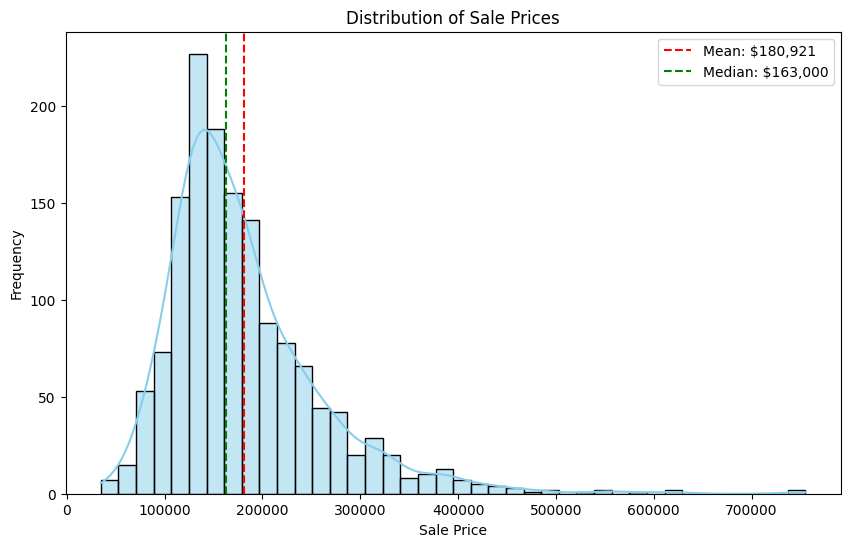

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(
    df['SalePrice'],
    kde=True,
    bins=40,
    color='skyblue'
)
plt.axvline(
    average_sales_price, color='red',
    linestyle='--',
    label=f'Mean: ${average_sales_price:,.0f}'
)
plt.axvline(
    median_sales_price,
    color='green',
    linestyle='--',
    label=f'Median: ${median_sales_price:,.0f}'
)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

---

## Correlation Analysis

In [22]:
correlation_matrix = df.corr()
print(correlation_matrix)

              1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  \
1stFlrSF      1.000000 -0.184843      0.124773      0.173525    0.445863   
2ndFlrSF     -0.184843  1.000000      0.480787     -0.089812   -0.130006   
BedroomAbvGr  0.124773  0.480787      1.000000     -0.087220   -0.101497   
BsmtExposure  0.173525 -0.089812     -0.087220      1.000000    0.177752   
BsmtFinSF1    0.445863 -0.130006     -0.101497      0.177752    1.000000   
BsmtFinType1  0.217370 -0.141681     -0.142332      0.226048    0.684694   
BsmtUnfSF     0.317987  0.007539      0.154381     -0.031864   -0.495251   
GarageArea    0.489782  0.131849      0.056957      0.197510    0.296970   
GarageFinish  0.267402  0.149024     -0.002778      0.142585    0.195727   
GarageYrBlt   0.233449  0.058254     -0.054573      0.222640    0.153484   
GrLivArea     0.566024  0.668139      0.515925      0.037536    0.208171   
KitchenQual   0.387027  0.158481     -0.013345      0.200791    0.228415   
LotArea     

Correlation with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.466754
GarageFinish    0.465039
OpenPorchSF     0.315856
2ndFlrSF        0.312479
BsmtExposure    0.229632
BedroomAbvGr    0.155784
OverallCond    -0.077856
Name: SalePrice, dtype: float64


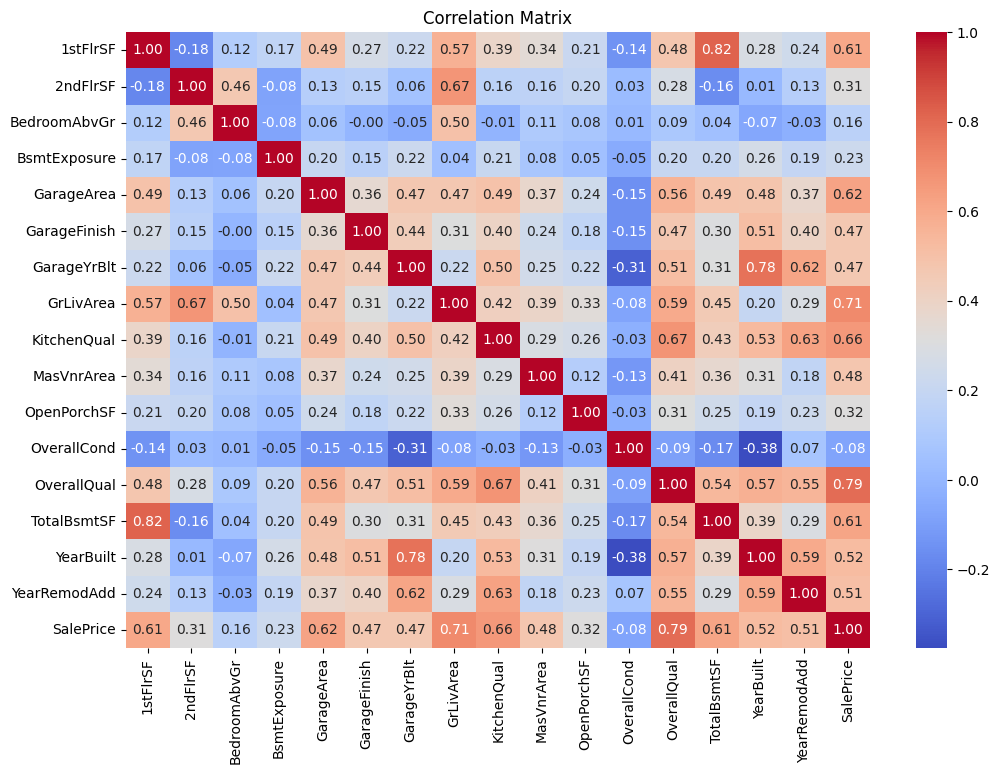

In [ ]:
correlation_matrix = df.corr()

# Focus on the correlation with 'SalePrice'
print("Correlation with SalePrice:")
correlation_with_saleprice = (
    correlation_matrix['SalePrice']
    .sort_values(ascending=False)
)
print(correlation_with_saleprice)

# Plot the correlation matrix using seaborn, matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=True
)
plt.title("Correlation Matrix")
plt.show()

The results of the correlation analysis are documented in README.md

---

## Analysis and insights of selected features

### Boxplot: 'SalePrice' & 'GrLivArea' 

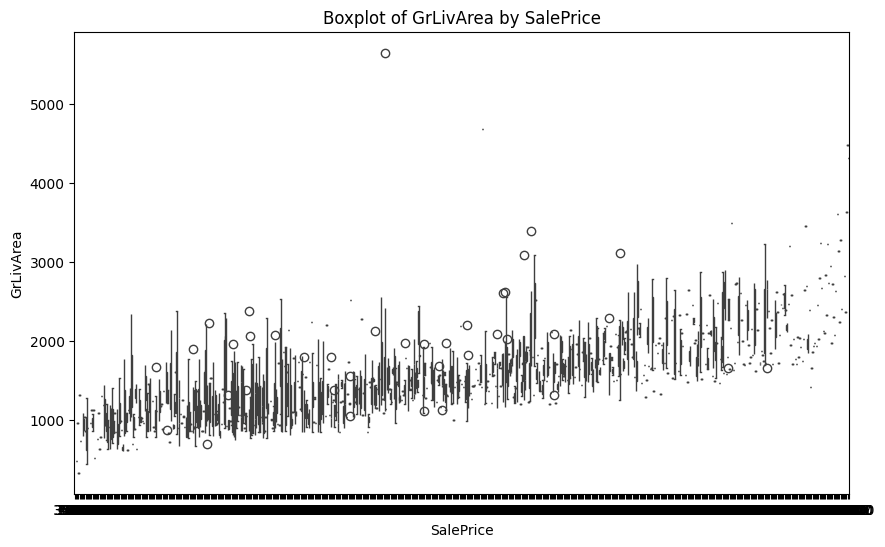

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalePrice', y='GrLivArea', data=df)
plt.title('Boxplot of GrLivArea by SalePrice')
plt.show()

The boxplot supports the findings from the correlation analysis, highlighting a strong positive relationship between SalePrice and GrLivArea. As GrLivArea increases, SalePrice tends to increase as well.

### Boxplot: 'SalePrice' & 'OverallQual'

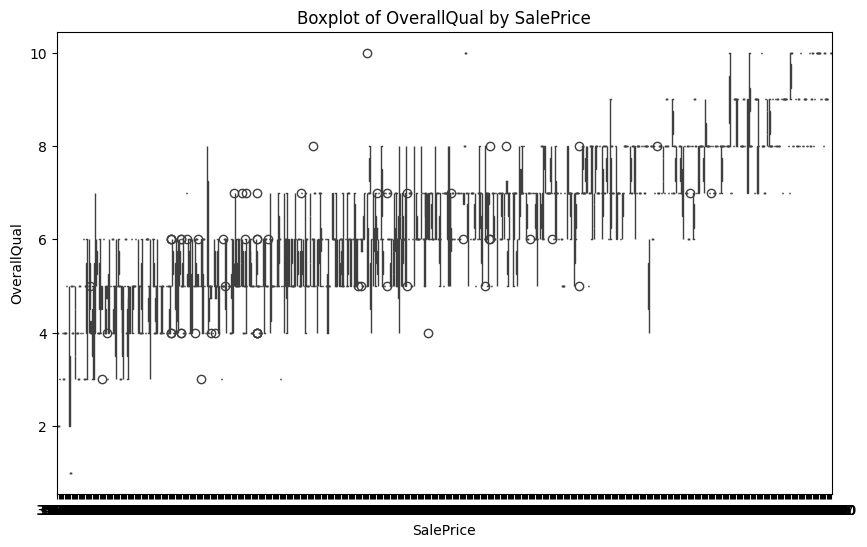

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalePrice', y='OverallQual', data=df)
plt.title('Boxplot of OverallQual by SalePrice')
plt.show()

### Distribution SalePrice/OverallQual

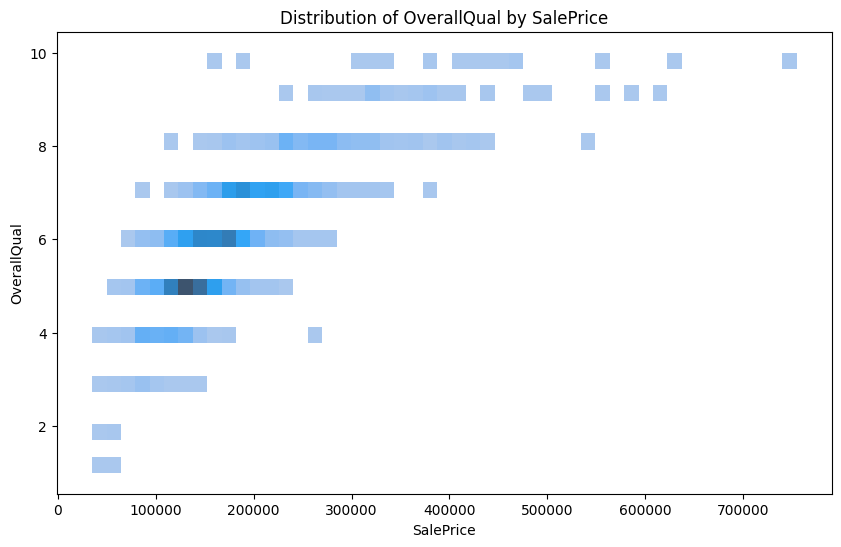

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='OverallQual', data=df, kde=True)
plt.title('Distribution of OverallQual by SalePrice')
plt.show()

The boxplot and the distribution supports the findings from the correlation analysis, highlighting a strong positive relationship between SalePrice and OverallQual. As OverallQual increases, SalePrice tends to increase as well.

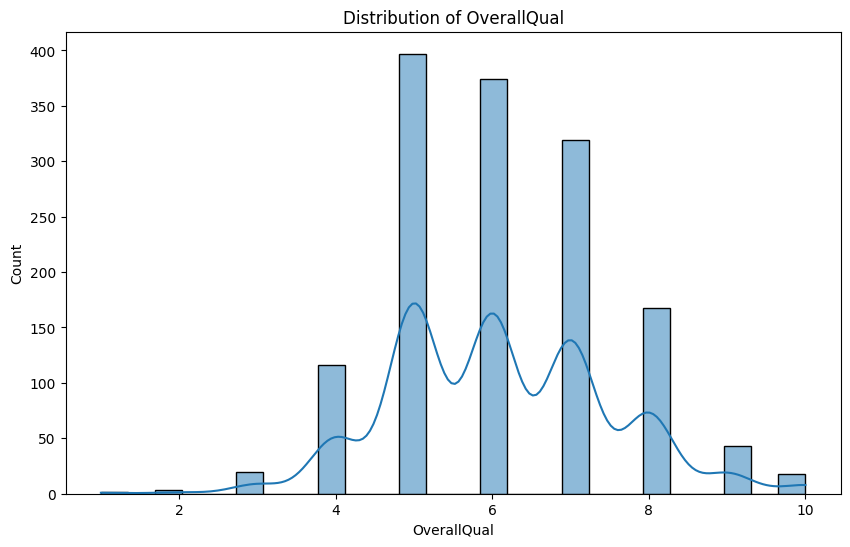

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['OverallQual'], kde=True)
plt.title('Distribution of OverallQual')
plt.show()

The distribution of OverallQual shows that the majority of houses has an overall quality of category 5 up to 7. It seems to be middle class living area.

---

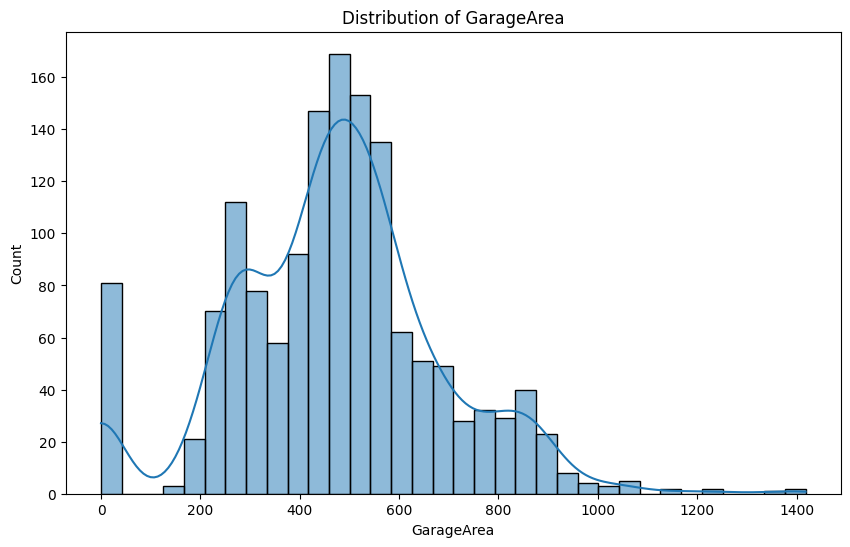

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GarageArea'], kde=True)
plt.title('Distribution of GarageArea')
plt.show()

The distribution shows:
* There are 80 houses without garages
* The majorty of garages have 280 up to 580 squarefeets
* There is no standard distribution
* garages bigger then 900 SF are very rare 

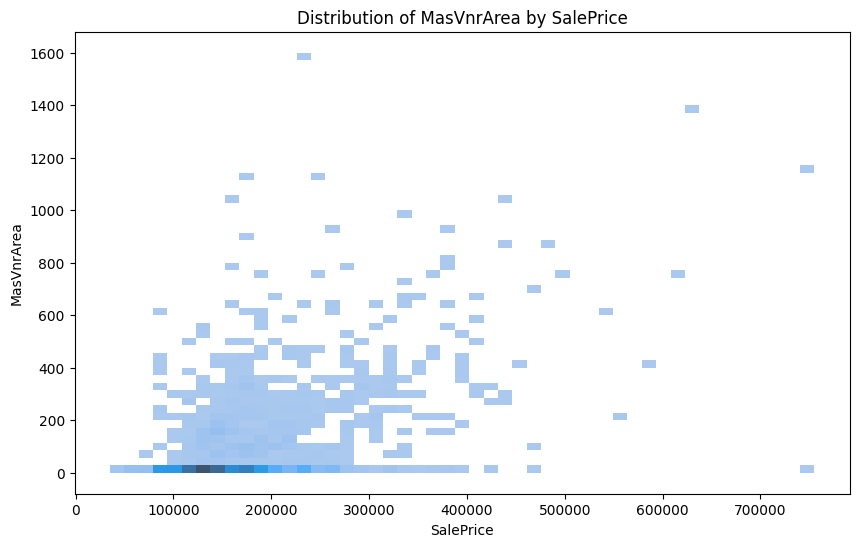

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='MasVnrArea', data=df, kde=True)
plt.title('Distribution of MasVnrArea by SalePrice')
plt.show()

The distribution diagram of MasVnrArea/ SalePrice shows a very low correlation to the sales price.

---

## Analyze hypothesis

### H1: Larger square footage often correlates with higher sales prices (?)

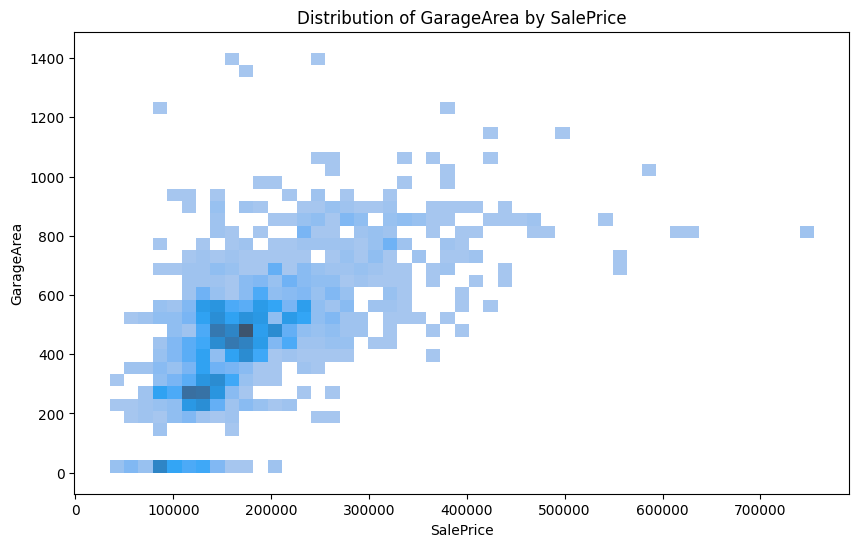

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='GarageArea', data=df, kde=True)
plt.title('Distribution of GarageArea by SalePrice')
plt.show()

### H2: More bedrooms, higher sales price (?)

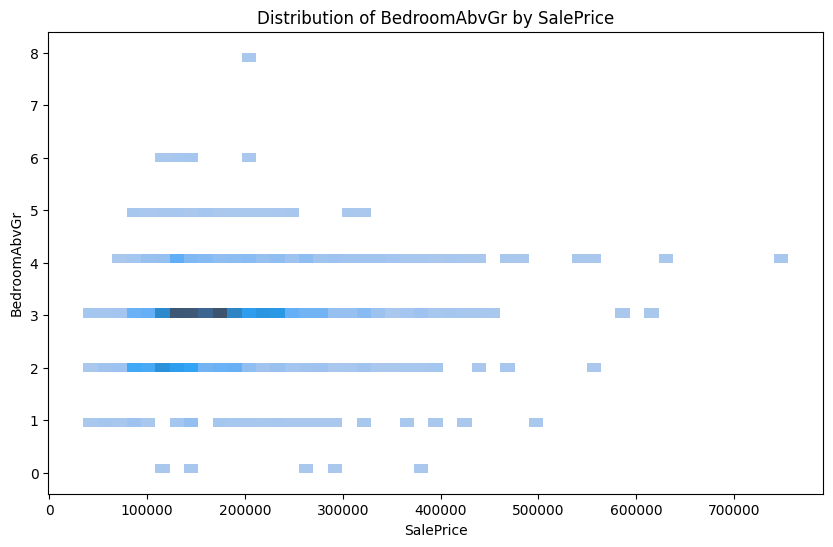

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='BedroomAbvGr', data=df, kde=True)
plt.title('Distribution of BedroomAbvGr by SalePrice')
plt.show()

### H3: Better OverallCond, higher sales price (?)

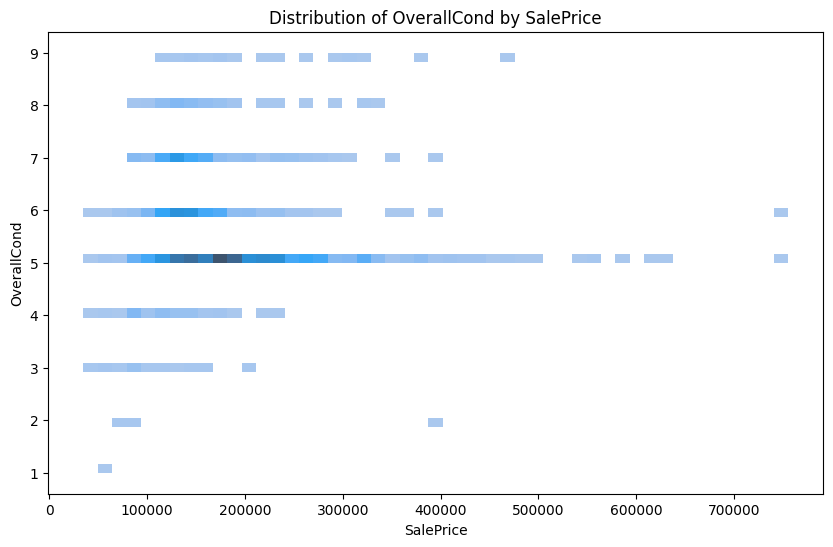

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='OverallCond', data=df, kde=True)
plt.title('Distribution of OverallCond by SalePrice')
plt.show()

### H4: Renovated old houses sell for more than non-renovated old houses

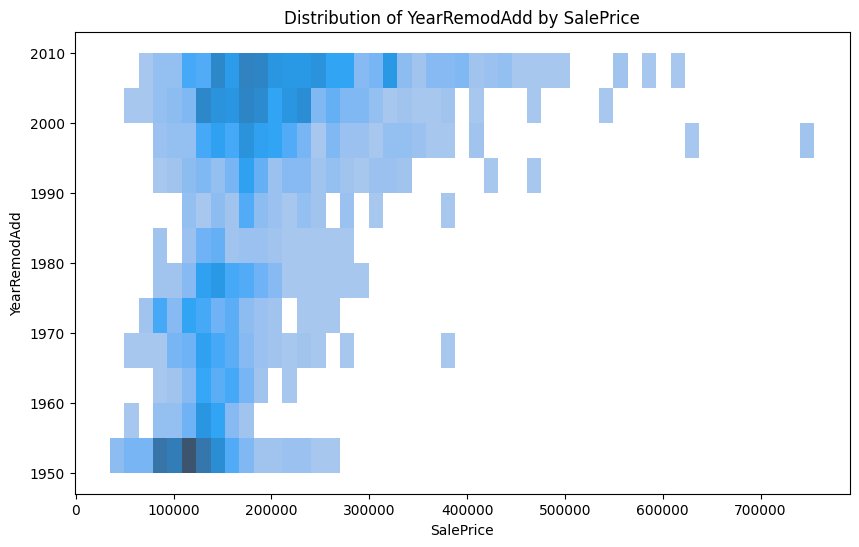

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='YearRemodAdd', data=df, kde=True)
plt.title('Distribution of YearRemodAdd by SalePrice')
plt.show()

There is no column directly labeled "Renovated", but common columns to use are:

    YearBuilt: Year the house was originally built

    YearRemodAdd: Year of the last remodeling (remodel or addition)

Step 1: Create Renovation Groups to dataframe df

In [15]:
df["IsRenovated"] = df["YearRemodAdd"] > df["YearBuilt"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   GarageFinish  1460 non-null   int64  
 6   GarageYrBlt   1460 non-null   float64
 7   GrLivArea     1460 non-null   int64  
 8   KitchenQual   1460 non-null   int64  
 9   MasVnrArea    1460 non-null   float64
 10  OpenPorchSF   1460 non-null   int64  
 11  OverallCond   1460 non-null   int64  
 12  OverallQual   1460 non-null   int64  
 13  TotalBsmtSF   1460 non-null   int64  
 14  YearBuilt     1460 non-null   int64  
 15  YearRemodAdd  1460 non-null   int64  
 16  SalePrice     1460 non-null   int64  
 17  IsRenovated   1460 non-null   bool   
dtypes: bool(1), float64(4), int6

In [17]:
df["IsRenovated"] = df["IsRenovated"].astype(int)

In [18]:
df[["YearBuilt", "YearRemodAdd", "SalePrice", "IsRenovated"]].head()

,YearBuilt,YearRemodAdd,SalePrice,IsRenovated
0,2003,2003,208500,0
1,1976,1976,181500,0
2,2001,2002,223500,1
3,1915,1970,140000,1
4,2000,2000,250000,0


This will show mean, std, min, max, etc., for renovated vs. non-renovated homes.

In [19]:
df.groupby("IsRenovated")["SalePrice"].describe()

,count,mean,std,min,25%,50%,75%,max
IsRenovated,,,,,,,,
0,764.0,182583.659686,70333.800127,55993.0,135500.0,170000.0,214000.0,745000.0
1,696.0,179096.307471,88383.080722,34900.0,121900.0,155000.0,213062.5,755000.0


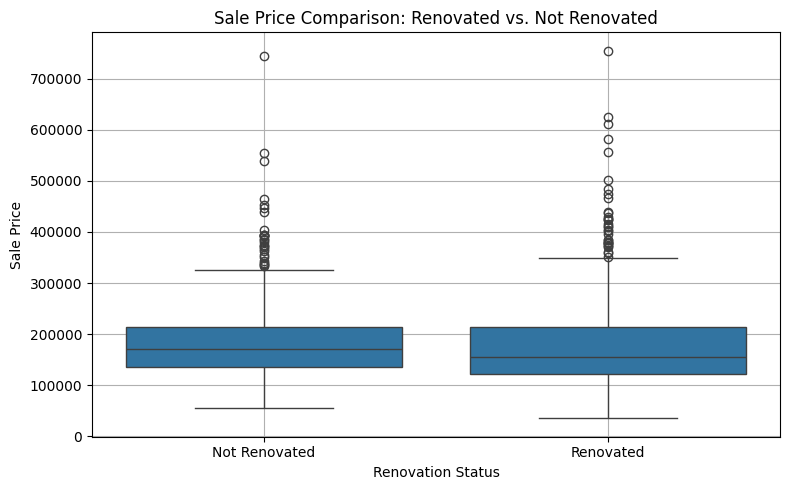

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="IsRenovated", y="SalePrice", data=df)
plt.title("Sale Price Comparison: Renovated vs. Not Renovated")
plt.xticks([0, 1], ['Not Renovated', 'Renovated'])  # Rename labels
plt.ylabel("Sale Price")
plt.xlabel("Renovation Status")
plt.grid(True)
plt.tight_layout()
plt.show()

Isolating the renovation effect more fairly. just comparing all renovated vs. non-renovated homes can be misleading if other factors (like size, quality, or age) aren’t balanced.

Let’s compare apples to apples

Compare houses with similar features but:

    Built long ago and renovated

    Built long ago and not renovated

    Optionally: compare also to recent builds (no renovation)

This isolates the effect of renovation, not just newness or house quality.

Step 2: Create a "Vintage" Category (Old Houses)

In [21]:
df["IsOld"] = df["YearBuilt"] <= 1970

Step 3: Filter to "Old Houses" Only

compare old renovated vs old not renovated, controlling for year built.

In [22]:
df_old = df[df["IsOld"] == True]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   GarageFinish  1460 non-null   int64  
 6   GarageYrBlt   1460 non-null   float64
 7   GrLivArea     1460 non-null   int64  
 8   KitchenQual   1460 non-null   int64  
 9   MasVnrArea    1460 non-null   float64
 10  OpenPorchSF   1460 non-null   int64  
 11  OverallCond   1460 non-null   int64  
 12  OverallQual   1460 non-null   int64  
 13  TotalBsmtSF   1460 non-null   int64  
 14  YearBuilt     1460 non-null   int64  
 15  YearRemodAdd  1460 non-null   int64  
 16  SalePrice     1460 non-null   int64  
 17  IsRenovated   1460 non-null   int32  
 18  IsOld         1460 non-null 

Step 4: Compare Renovated vs Not Renovated Among Old Houses

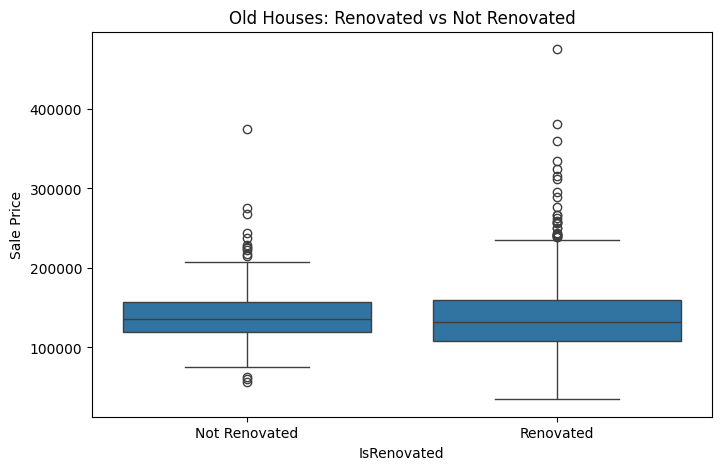

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="IsRenovated", y="SalePrice", data=df_old)
plt.title("Old Houses: Renovated vs Not Renovated")
plt.xticks([0, 1], ['Not Renovated', 'Renovated'])
plt.ylabel("Sale Price")
plt.show()

In [25]:
from scipy.stats import ttest_ind

renovated_old = df_old[df_old["IsRenovated"] == 1]["SalePrice"]
not_renovated_old = df_old[df_old["IsRenovated"] == 0]["SalePrice"]

t_stat, p_val = ttest_ind(
    renovated_old,
    not_renovated_old,
    equal_var=False
)

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.4f}")

t-statistic: 0.14
p-value: 0.8871


Step 5: Run a Regression Just on Old Houses

In [27]:
df_old_model = df_old[[
    "SalePrice",
    "GrLivArea",
    "OverallQual",
    "IsRenovated"
]].dropna()
X = df_old_model[[
    "GrLivArea",
    "OverallQual",
    "IsRenovated"
]]
y = df_old_model["SalePrice"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     342.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.84e-135
Time:                        17:08:25   Log-Likelihood:                -8023.5
No. Observations:                 684   AIC:                         1.606e+04
Df Residuals:                     680   BIC:                         1.607e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.707e+04   6104.791     -2.796      

Step 5: Run a Regression on all Houses

In [28]:
# Optional: Drop rows with NaNs in any of these columns
df_model = df[[
    "SalePrice",
    "GrLivArea",
    "OverallQual",
    "YearBuilt",
    "IsRenovated"
]].dropna()

# Define predictors and target
X = df_model[[
    "GrLivArea",
    "OverallQual",
    "YearBuilt",
    "IsRenovated"
]]
y = df_model["SalePrice"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1045.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:08:54   Log-Likelihood:                -17555.
No. Observations:                1460   AIC:                         3.512e+04
Df Residuals:                    1455   BIC:                         3.515e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.261e+06   9.28e+04    -13.588      

### H5: Newer houses are more expensive

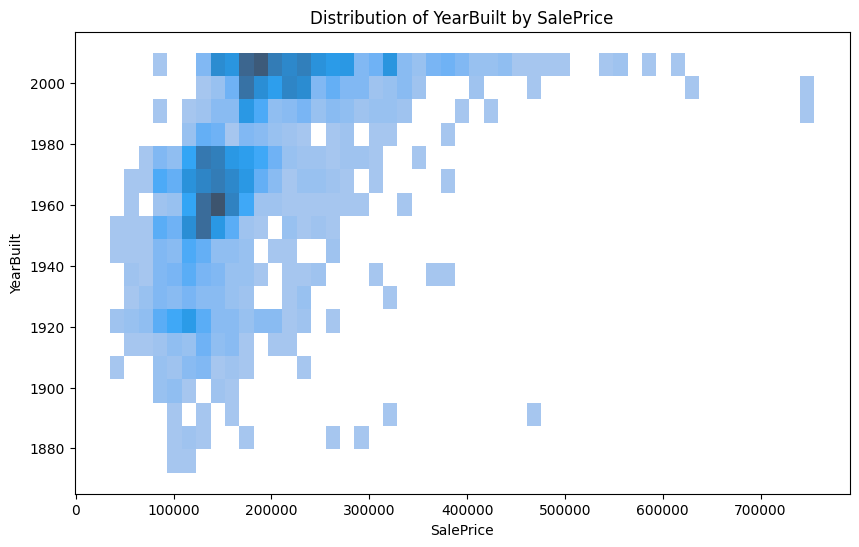

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='YearBuilt', data=df, kde=True)
plt.title('Distribution of YearBuilt by SalePrice')
plt.show()

### Define a threshold to split into new and old houses

Quantiles or percentiles (e.g. top 25% = new, bottom 25% = old) could be also used for more balanced groups. However, it's just simplified here by just defining the threshold_year based in own analysis.

In [31]:

threshold_year = 2000
df['House_Age_Group'] = (
    df['YearBuilt'].
    apply(lambda x: 'New' if x >= threshold_year else 'Old')
)

Apply control for confounding. Compare houses of similar characteristics (e.g., same GrLivArea, OverallQual, etc.), only differing in YearBuilt.

In [32]:
# Example: houses with same size and quality, +/-10%
GrLivArea_reference = 1500
OverallQual_reference = 7

df_filtered = df[
    (df['GrLivArea'].between(GrLivArea_reference * 0.9, GrLivArea_reference * 1.1)) &
    (df['OverallQual'] == OverallQual_reference)
]

### Control for all other factors using regression

In [33]:
import statsmodels.api as sm

# Add a binary feature for new vs. old
df['IsNew'] = (df['YearBuilt'] >= threshold_year).astype(int)

# Select features for regression
features = ['GrLivArea', 'GarageArea', 'OverallQual', 'IsNew']
X = df[features]
y = df['SalePrice']

# Add constant (for intercept)
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1047.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:09:53   Log-Likelihood:                -17555.
No. Observations:                1460   AIC:                         3.512e+04
Df Residuals:                    1455   BIC:                         3.515e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.985e+04   5373.778    -16.719      

if it’s positive and significant (p < 0.05), then you can say newer houses tend to be more expensive controlling for other features.

Compare average prices between New and Old.

In [20]:
from scipy.stats import ttest_ind

new_prices = df_filtered[df_filtered['House_Age_Group'] == 'New']['SalePrice']
old_prices = df_filtered[df_filtered['House_Age_Group'] == 'Old']['SalePrice']

t_stat, p_value = ttest_ind(new_prices, old_prices, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: 2.59, P-value: 0.0123


If p-value < 0.05, there's a statistically significant difference. It is 0.0123

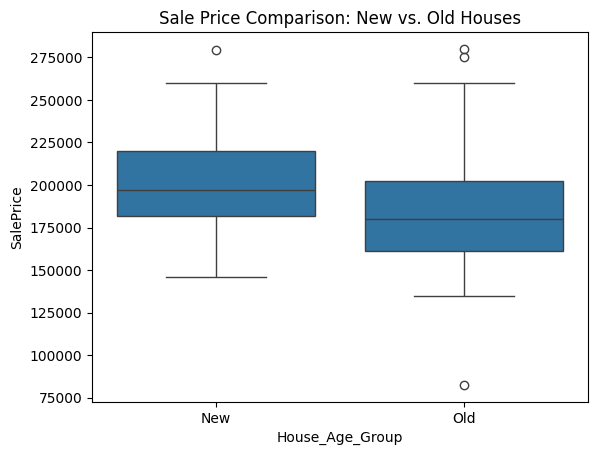

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_filtered, x='House_Age_Group', y='SalePrice')
plt.title("Sale Price Comparison: New vs. Old Houses")
plt.show()

---

## Push adjusted dataset to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/data_cleaned') # create folder
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/data_cleaned'


In [ ]:
df.to_csv(
    f"outputs/data_cleaned/house_market_study.csv",index=False
)

In [ ]:
df_filtered.to_csv(
    f"outputs/data_cleaned/house_market_study_filtered.csv",index=False
)